Import Libraries and Data

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# from pathlib import Path

plt.style.use('ggplot')

In [10]:
sys.path.append('../src')

import config

In [11]:
TRAINING_FILE = config.eda_params['TRAINING_FILE']
NOTES = config.eda_params['TRAINING_FILE_NOTES']

In [12]:
df = pd.read_csv(TRAINING_FILE)

In [13]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,...,552.000000,552.000000,552.000000,552.000000,550.000000,550.000000,552.000000,552.000000,552.000000,552.000000
mean,1.251812,1.056159,0.565217,0.465580,11.695652,10.686594,3.885870,3.317029,12.650362,12.226449,...,1.720797,-0.153533,1.941286,1.952373,1.951236,1.962127,1.995761,2.008460,1.919674,1.931431
std,1.185207,1.016434,0.744797,0.696564,4.410199,4.419225,2.330968,1.953878,3.530402,3.575145,...,0.179909,0.454461,0.103998,0.102461,0.103614,0.104697,0.105300,0.107846,0.096850,0.097885
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,4.000000,2.000000,...,1.390000,-1.750000,1.630000,1.680000,1.660000,1.730000,1.800000,1.800000,1.710000,1.730000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,7.000000,2.000000,2.000000,10.000000,10.000000,...,1.600000,-0.500000,1.860000,1.860000,1.860000,1.880000,1.910000,1.920000,1.840000,1.840000
50%,1.000000,1.000000,0.000000,0.000000,11.500000,10.000000,4.000000,3.000000,12.000000,12.000000,...,1.700000,-0.250000,1.940000,1.960000,1.940000,1.960000,1.990000,2.000000,1.920000,1.930000
75%,2.000000,2.000000,1.000000,1.000000,14.000000,13.000000,5.000000,5.000000,15.000000,14.000000,...,1.810000,0.250000,2.030000,2.040000,2.040000,2.050000,2.080000,2.090000,2.010000,2.010000
max,7.000000,5.000000,5.000000,3.000000,27.000000,26.000000,16.000000,10.000000,26.000000,25.000000,...,2.550000,1.500000,2.170000,2.250000,2.220000,2.340000,2.250000,2.400000,2.140000,2.200000


In [14]:
df.info

<bound method DataFrame.info of     Div        Date   Time       HomeTeam       AwayTeam  FTHG  FTAG FTR  \
0    E1  11/09/2020  19:45        Watford  Middlesbrough     1     0   H   
1    E1  12/09/2020  12:30     Birmingham      Brentford     1     0   H   
2    E1  12/09/2020  12:30        Wycombe      Rotherham     0     1   A   
3    E1  12/09/2020  15:00       Barnsley          Luton     0     1   A   
4    E1  12/09/2020  15:00    Bournemouth      Blackburn     3     2   H   
..   ..         ...    ...            ...            ...   ...   ...  ..   
547  E1  08/05/2021  12:30  Middlesbrough        Wycombe     0     3   A   
548  E1  08/05/2021  12:30  Nott'm Forest        Preston     1     2   A   
549  E1  08/05/2021  12:30            QPR          Luton     3     1   H   
550  E1  08/05/2021  12:30        Reading   Huddersfield     2     2   D   
551  E1  08/05/2021  12:30        Watford        Swansea     2     0   H   

     HTHG  HTAG  ... AvgC<2.5  AHCh  B365CAHH  B365CAHA

In [15]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

Use the Notes File to Create a Dictionary with the description of each column

In [16]:
def clean_notes_files(file_name: str) -> dict:
    """
    Use the notes.txt file to create a Dict that stores all the information
    of the columns.
    """
    with open(file=file_name) as f:
        lines = [line.rstrip() for line in f]

    lines = [lines[i] for i in range(len(lines)) if '=' in lines[i]]

    notes_dict = {}

    for l in lines:
        l_split = l.split('=', maxsplit=1)
        notes_dict[l_split[0].split(' ')[0]] = l_split[1]

    return notes_dict

In [17]:
### Check that the Dict works
clean_file_dict = clean_notes_files(NOTES)

for i in range(len(df.columns)):
    print(df.columns[i], clean_file_dict[df.columns[i]])

    if i == 5:
        break


Div  League Division
Date  Match Date (dd/mm/yy)
Time  Time of match kick off
HomeTeam  Home Team
AwayTeam  Away Team
FTHG  Full Time Home Team Goals


In [18]:
sns.set(rc={'figure.figsize': (5, 5)})

In [19]:
# Create an array with the names of the teams in our data
teams = np.unique(df['HomeTeam'].values)

CREATE A PLOT FOR A HOME TEAM IN THE CHAMPIONSHIP AND ITS CHANCE OF WIN, LOSS, DRAW


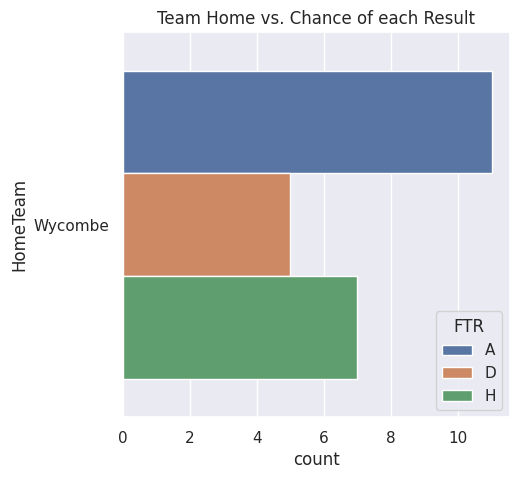

In [20]:

print("CREATE A PLOT FOR A HOME TEAM IN THE CHAMPIONSHIP AND ITS CHANCE OF WIN, LOSS, DRAW")

ax = sns.countplot(y='HomeTeam', hue='FTR', data=df[df['HomeTeam']==np.random.choice(teams)])

for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.01, patch_height+3))

plt.title("Team Home vs. Chance of each Result")
plt.show()


CREATE A PLOT FOR A AWAY TEAM IN THE CHAMPIONSHIP AND ITS CHANCE OF WIN, LOSS, DRAW


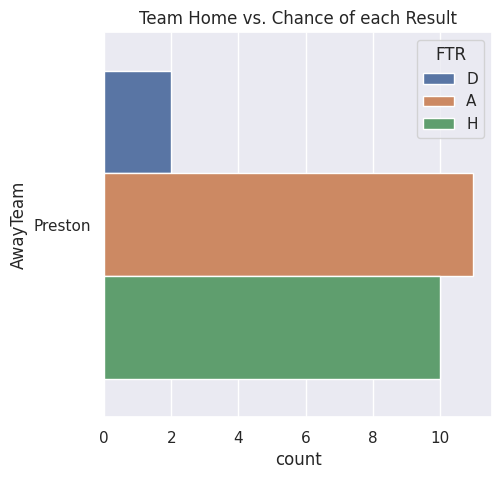

In [21]:

print("CREATE A PLOT FOR A AWAY TEAM IN THE CHAMPIONSHIP AND ITS CHANCE OF WIN, LOSS, DRAW")

ax = sns.countplot(y='AwayTeam', hue='FTR', data=df[df['AwayTeam']==np.random.choice(teams)])

for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.01, patch_height+3))

plt.title("Team Home vs. Chance of each Result")
plt.show()


In [22]:
# Create the above as average of Home Team

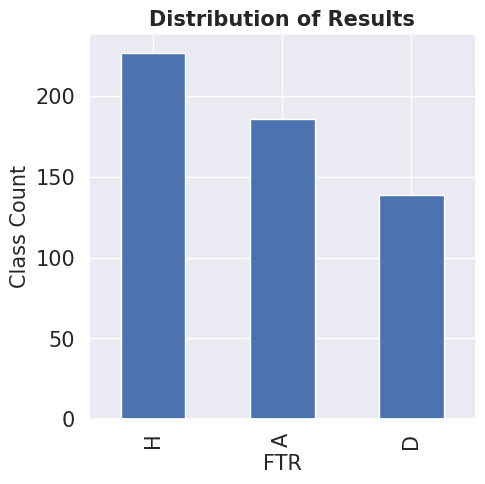

In [23]:
# Convert to sns + HomeTeam / AwayTeam same graph (hue)

counts = df.FTR.value_counts()
fig, ax = plt.subplots(figsize=(5, 5))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Result', fontsize=15)
ax.set_ylabel('Class Count', fontsize=15)
ax.set_title('Distribution of Results', fontsize=15, fontweight='bold')
_ = counts.plot(ax=ax, kind='bar')

# EXPLORE THE NUMBER OF GOALS EACH TEAM SCORED IN HOME AND AWAY

In [24]:
h_t = df.groupby("HomeTeam")["FTHG"].sum().reset_index().sort_values(by="FTHG",ascending=False)
a_t = df.groupby("AwayTeam")["FTAG"].sum().reset_index().sort_values(by="FTAG",ascending=False)

/tmp/ipykernel_107853/3146098856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y="HomeTeam", x="FTHG",
/tmp/ipykernel_107853/3146098856.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y = "AwayTeam", x="FTAG",


Text(0.5, 1.0, 'Top Teams by AG')

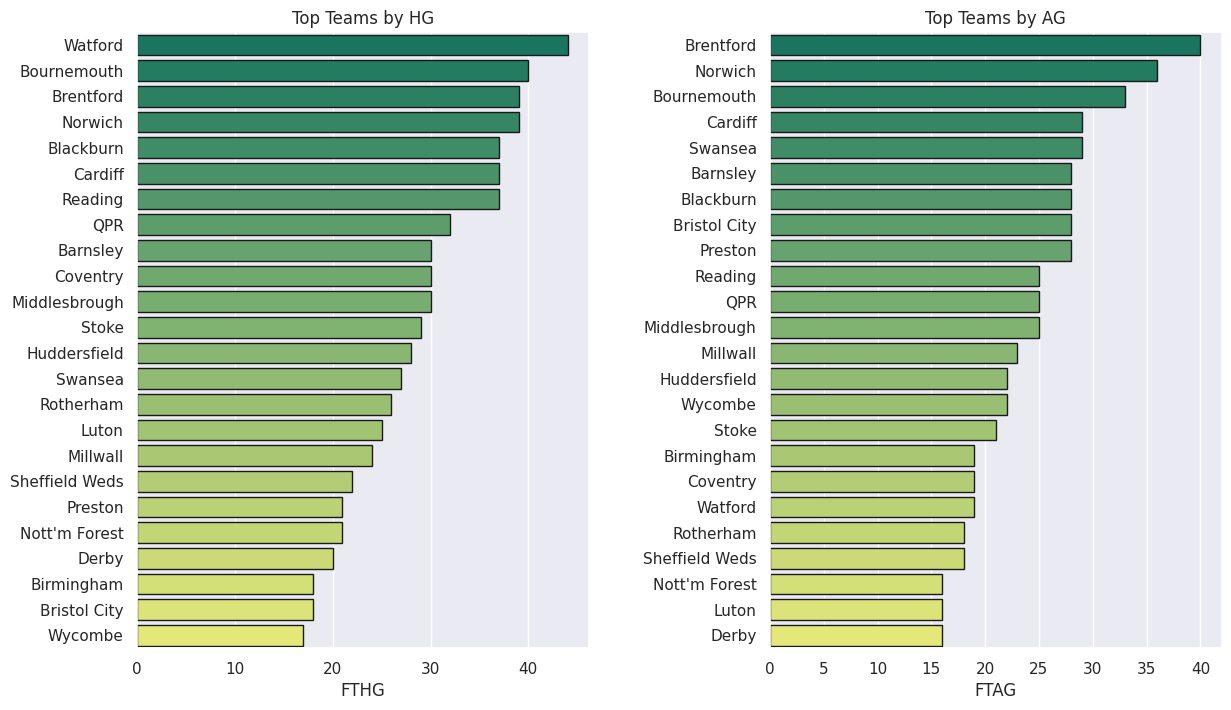

In [25]:
plt.figure(figsize=(14, 8))
plt.subplot(121)

ax = sns.barplot(y="HomeTeam", x="FTHG",
                 data=h_t,
                 palette="summer",
                 linewidth=1,
                 edgecolor="k")
plt.ylabel('')
plt.title("Top Teams by HG")

# for i, j in enumerate(h_t["FTHG"]):
#     ax.text(1., i, j)

plt.subplot(122)

ax = sns.barplot(y = "AwayTeam", x="FTAG",
                 data=a_t, 
                 palette="summer",
                 linewidth=1, 
                 edgecolor="k")

plt.ylabel("")
plt.subplots_adjust(wspace=.4)
plt.title("Top Teams by AG")
# for i, j in enumerate(a_t["FTAG"]):
#     ax.text(1., i, j)


In [26]:
# Sort by league Table the above graph

# Correlation Matrix

In [27]:
# Before we proceed with the correlation, we have to change the object values to category

df_copy = df.copy()
df_copy['FTR'] = df_copy['FTR'].astype('category').cat.codes

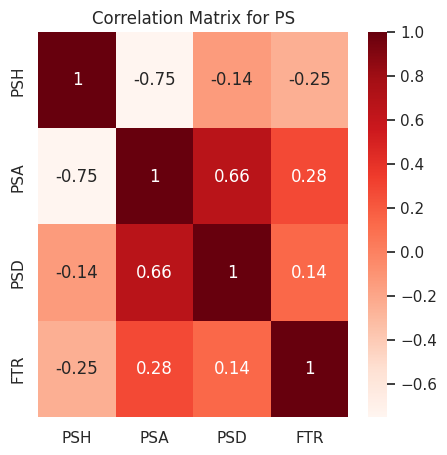

In [28]:
# Pearson Correlation
# Adjust the plot 
# Add a column with the projected result from the Betting Company
# Lower value of bets -> Winning result

bet_name = ['B365', 'BW', 'IW', 'PS',
            'VC', 'WH']

# Choose one of the names in the Bet Companies at random!
bet_name = bet_name[np.random.randint(0, len(bet_name))]

plt.figure(figsize=(5, 5))

cor = df_copy[[bet_name+'H', bet_name+'A', bet_name+'D', 'FTR']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title(f"Correlation Matrix for {bet_name}")
plt.show()

# Scatter Plots

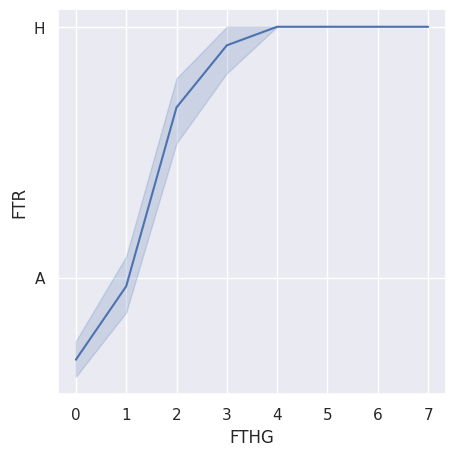

In [29]:
sns.lineplot(x='FTHG',
        y='FTR',
        data=df)

plt.show()

# Histogram
Goal Distributions (Home / Away)